In [1]:
import requests
from bs4 import BeautifulSoup

response = requests.get("http://paullab.synology.me/stock.html")

response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

In [2]:
soup.select('#update')[0].text

'update : 20.12.30'

In [3]:
메인정보 = soup.select('.main')[1]
메인정보.select('td')

[<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>,
 <td>위니브월드 <em id="_market_sum">1</em>위</td>,
 <td><em id="_market_sum">5,969,782,550</em></td>,
 <td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>,
 <td>
 <em>62,800</em>
 <span class="bar">l</span>
 <em>42,300</em>
 </td>,
 <td>
 <em id="_dvr">2.42</em>%
                 </td>,
 <td class="strong">22,125,034,978,750원</td>,
 <td>19,223,803,154,781원</td>,
 <td><em id="_market_sum">2,901,231,823,969원</em></td>]

In [4]:
메인정보.select('td')[0].text

'349조 2,323억원'

In [5]:
메인정보.select('td')[1].text

'위니브월드 1위'

In [6]:
soup.select('.table > tbody > tr')[1]

<tr>
<td align="center "><span class="date ">2019.10.23</span></td>
<td class="num "><span>6,650</span></td>
<td class="num ">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num "><span>6,590</span></td>
<td class="num "><span>6,830</span></td>
<td class="num "><span>6,580</span></td>
<td class="num "><span>398,421</span></td>
</tr>

In [7]:
oneStep = soup.select('.main')[2]

In [8]:
oneStep.select('tbody > tr')

[<tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>, <tr>
 <td align="center "><span class="date ">2019.10.23</span></td>
 <td class="num "><span>6,650</span></td>
 <td class="num ">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num "><span>6,590</span></td>
 <td class="num "><span>6,830</span></td>
 <td class="num "><span>6,580</span></td>
 <td class="num "><span>398,421</span></td>
 </tr>, <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,830

In [9]:
twoStep = oneStep.select('tbody > tr')[1:]

In [10]:
twoStep[0].select('td')[1].text

'6,650'

In [11]:
twoStep[0].select('td')[1].text.replace(',', '')

'6650'

In [12]:
날짜 = []
종가 = []
전일비 = []
거래량 = []

for i in twoStep:
    날짜.append(i.select('td')[0].text)
    종가.append(int(i.select('td')[1].text.replace(',', '')))
    전일비.append(int(i.select('td')[2].text.replace(',', '')))
    거래량.append(int(i.select('td')[6].text.replace(',', '')))

In [13]:
날짜

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

In [14]:
종가

[6650,
 6630,
 6820,
 6430,
 5950,
 5930,
 5640,
 5380,
 5040,
 5100,
 5050,
 4940,
 5010,
 4920,
 5010,
 5000,
 5010,
 5060,
 5060,
 5330]

In [15]:
전일비

[20,
 190,
 390,
 480,
 20,
 290,
 260,
 340,
 60,
 50,
 110,
 70,
 90,
 90,
 10,
 10,
 50,
 0,
 270,
 10]

In [16]:
거래량

[398421,
 919571,
 1678055,
 2168857,
 1982922,
 839434,
 702104,
 764800,
 134558,
 288563,
 223839,
 199580,
 188467,
 160510,
 246145,
 705046,
 408859,
 404633,
 441923,
 211019]

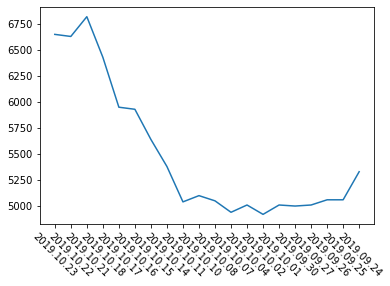

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(날짜, 종가)
plt.xticks(rotation = -45 )
plt.show()

In [18]:
l = []

for i in range(len(날짜)):
    l.append({
        '날짜':날짜[i],
        '종가':종가[i],
        '전일비':전일비[i],
        '거래량':거래량[i],
        })
l

[{'거래량': 398421, '날짜': '2019.10.23', '전일비': 20, '종가': 6650},
 {'거래량': 919571, '날짜': '2019.10.22', '전일비': 190, '종가': 6630},
 {'거래량': 1678055, '날짜': '2019.10.21', '전일비': 390, '종가': 6820},
 {'거래량': 2168857, '날짜': '2019.10.18', '전일비': 480, '종가': 6430},
 {'거래량': 1982922, '날짜': '2019.10.17', '전일비': 20, '종가': 5950},
 {'거래량': 839434, '날짜': '2019.10.16', '전일비': 290, '종가': 5930},
 {'거래량': 702104, '날짜': '2019.10.15', '전일비': 260, '종가': 5640},
 {'거래량': 764800, '날짜': '2019.10.14', '전일비': 340, '종가': 5380},
 {'거래량': 134558, '날짜': '2019.10.11', '전일비': 60, '종가': 5040},
 {'거래량': 288563, '날짜': '2019.10.10', '전일비': 50, '종가': 5100},
 {'거래량': 223839, '날짜': '2019.10.08', '전일비': 110, '종가': 5050},
 {'거래량': 199580, '날짜': '2019.10.07', '전일비': 70, '종가': 4940},
 {'거래량': 188467, '날짜': '2019.10.04', '전일비': 90, '종가': 5010},
 {'거래량': 160510, '날짜': '2019.10.02', '전일비': 90, '종가': 4920},
 {'거래량': 246145, '날짜': '2019.10.01', '전일비': 10, '종가': 5010},
 {'거래량': 705046, '날짜': '2019.09.30', '전일비': 10, '종가': 5000},
 {'거래량': 40885

In [19]:
import requests
from bs4 import BeautifulSoup

response = requests.get("http://paullab.synology.me/stock.html")

response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

oneStep = soup.select('.main')[2]
twoStep = oneStep.select('tbody > tr')[1:]

날짜 = []
종가 = []
전일비 = []
거래량 = []

for i in twoStep:
    날짜.append(i.select('td')[0].text)
    종가.append(int(i.select('td')[1].text.replace(',', '')))
    전일비.append(int(i.select('td')[2].text.replace(',', '')))
    거래량.append(int(i.select('td')[6].text.replace(',', '')))

l = []

for i in range(len(날짜)):
    l.append({
        '날짜':날짜[i],
        '종가':종가[i],
        '전일비':전일비[i],
        '거래량':거래량[i],
        })
l

[{'거래량': 398421, '날짜': '2019.10.23', '전일비': 20, '종가': 6650},
 {'거래량': 919571, '날짜': '2019.10.22', '전일비': 190, '종가': 6630},
 {'거래량': 1678055, '날짜': '2019.10.21', '전일비': 390, '종가': 6820},
 {'거래량': 2168857, '날짜': '2019.10.18', '전일비': 480, '종가': 6430},
 {'거래량': 1982922, '날짜': '2019.10.17', '전일비': 20, '종가': 5950},
 {'거래량': 839434, '날짜': '2019.10.16', '전일비': 290, '종가': 5930},
 {'거래량': 702104, '날짜': '2019.10.15', '전일비': 260, '종가': 5640},
 {'거래량': 764800, '날짜': '2019.10.14', '전일비': 340, '종가': 5380},
 {'거래량': 134558, '날짜': '2019.10.11', '전일비': 60, '종가': 5040},
 {'거래량': 288563, '날짜': '2019.10.10', '전일비': 50, '종가': 5100},
 {'거래량': 223839, '날짜': '2019.10.08', '전일비': 110, '종가': 5050},
 {'거래량': 199580, '날짜': '2019.10.07', '전일비': 70, '종가': 4940},
 {'거래량': 188467, '날짜': '2019.10.04', '전일비': 90, '종가': 5010},
 {'거래량': 160510, '날짜': '2019.10.02', '전일비': 90, '종가': 4920},
 {'거래량': 246145, '날짜': '2019.10.01', '전일비': 10, '종가': 5010},
 {'거래량': 705046, '날짜': '2019.09.30', '전일비': 10, '종가': 5000},
 {'거래량': 40885